최고기온 + 해당일자 찾기

In [1]:
import csv

f=open('./data/seoul.csv')   # seoul.csv 파일을 일기 모드로 불러옴
data=csv.reader(f)
header=next(data)            # 첫번째 행(제목행)  header 변수에 저장

max_temp=0.0     # 온도, 실수형
max_day=""       # 날짜

for row in data:
    if row[4]!="":                     # 공백 데이터인지 확인
        if float(row[4])>max_temp:     # 온도를 실수형 자료로 변경 후 저장
            max_temp=float(row[4])     # 날짜 정보 저장
            max_day=row[2]
            
print(f'최고기온: {max_temp}, 날짜:{max_day}')

최고기온: 39.6, 날짜:2018-08-01


## matplotlib 라이브러리를 이용한 시각화¶
- 파이썬 시각화 모듈
- 2D 형태의 그래프, 이미지 등을 사용할때 적용
- 실제 과학 컴퓨팅 연구 분야나 인공지능 연구 분야에서도 많이 활용
- https://matplotlib.org/

In [5]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

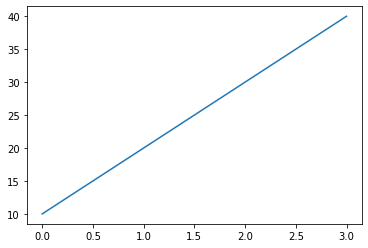

In [4]:
plt.plot([10,20,30,40])    # 메모리에 기본 차트(꺾은선) 생성
plt.show()                 # 화면에 차트 출력하기

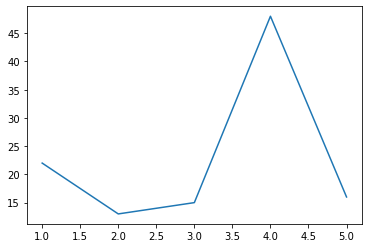

In [6]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5]
y=[22,13,15,48,16]

plt.plot(x, y)      # x축, y축 값 설정 
plt.show()

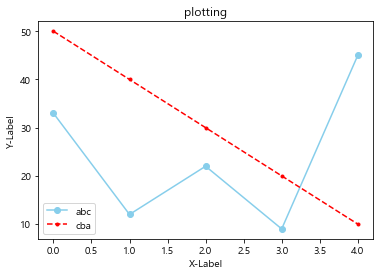

In [13]:
# plt 영역에 여러 개의 차트 및 내용 표시
import matplotlib.pyplot as plt

plt.plot([33,12,22,9,45], label='abc', color='skyblue', marker="o")   # 1번 차트 및 옵션 
plt.plot([50,40,30,20,10], 'r', label="cba", marker="." ,linestyle="--" )  # 2번 차트 및 옵션

plt.title("plotting")      # 차트 제목 출력
plt.xlabel("X-Label")      # x 축제목
plt.ylabel("Y-Label")      # y 축제목
plt.legend()               # 범례 출력

plt.show()

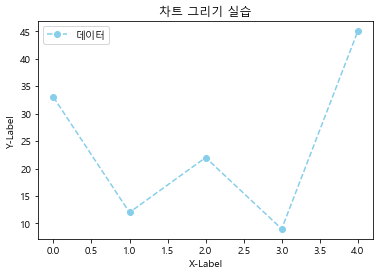

In [8]:
# plt 차트에서 한글 지원 방법1
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#from matplotlib import font_manager as fm
font_path="C:/Windows/Fonts/malgun.ttf"      # 한글 폰트 경로 및 이름 정의(윈도우10 기반)
font_name=fm.FontProperties(fname=font_path).get_name()  # 포트 속성 변경
plt.rc('font', family=font_name)   # 차트 전체 포트 속성 변경

plt.plot([33,12,22,9,45], label='데이터', color='skyblue', 
         marker="o",linestyle="--") 

plt.title("차트 그리기 실습")      # 차트 제목 출력
plt.xlabel("X-Label")      # x 축제목
plt.ylabel("Y-Label")      # y 축제목
plt.legend()               # 범례 출력

plt.show()

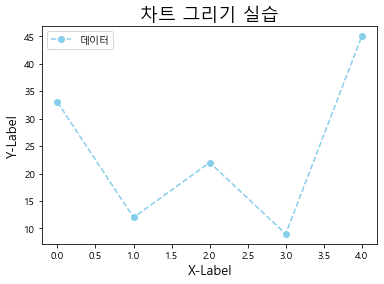

In [14]:
# plt 차트에서 한글 지원 방법1
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path="C:/Windows/Fonts/malgun.ttf"    
font_name1=fm.FontProperties(fname=font_path, size=18)   # 기본 폰트 및 사이즈 정의
font_name2=fm.FontProperties(fname=font_path, size=13)


plt.plot([33,12,22,9,45], label='데이터', color='skyblue', 
         marker="o",linestyle="--") 

plt.title("차트 그리기 실습", fontproperties=font_name1)      # 차트 제목에 font_name 적용
plt.xlabel("X-Label", fontproperties=font_name2)      # x 축제목
plt.ylabel("Y-Label", fontproperties=font_name2)      # y 축제목
plt.legend()               # 범례 출력

plt.show()

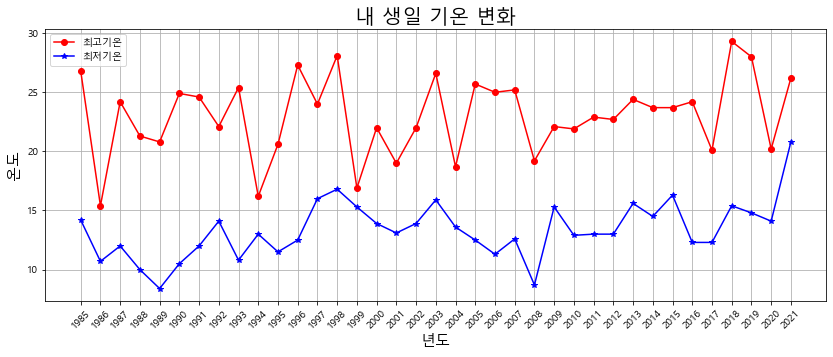

In [15]:
# ['\t\t108', '서울', '1907-10-01', '13.5', '20.7', '', '7.9', '12.8']
# 날짜 데이터(row[2])를 가져와 "-"를 기준으로 글자 나누기
# 생일에 따를 년도별 최고기온/최저기온 차트 출력

import csv

f=open('./data/seoul.csv', encoding='cp949')   
data=csv.reader(f)
header=next(data)

max_temp=[]    # 최고기온
min_temp=[]    # 최저기온
year_temp=[]   # 생일자 년도

for row in data:
    if row[2] !="":
        if int(row[2].split('-')[0]) >= 1985:   # 1985년 이후 데이터 검색
            if row[2][-5:]=="05-15":            # 5월 15일 데이터만 추출
                max_temp.append(float(row[4]))
                min_temp.append(float(row[-2]))
                year_temp.append(row[2].split('-')[0])

                
# 데이터를 이용한 시각화

plt.figure(figsize=(14, 5))  # 차트 크기 설정
plt.plot(year_temp, max_temp, label='최고기온', color='r', marker="o")
plt.plot(year_temp, min_temp, label='최저기온', color='b', marker='*')

plt.xticks(size=10, rotation=45)   # x축 라벨에 대한 회전, 글자크기, 'vertical' 90도

plt.title('내 생일 기온 변화', size=20)
plt.xlabel('년도', size=15)
plt.ylabel('온도', size=15)
plt.legend(loc='best')   # best, lower right, ...
plt.grid(True)     # 그림 영역에 그리드 표시

plt.show()

## 미션: 평균데이터를 이용한 년도별 차트 출력
- 1960년이후 1월 15일 데이터를 기준으로 평균기온을 이용해 차트 작성
- 1960년이후 8월 15일 데이터를 기준으로 평균기온을 이용해 차트 작성
- 기간: 1960~2020년까지

C:\Users\wooky\.conda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wooky\.conda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


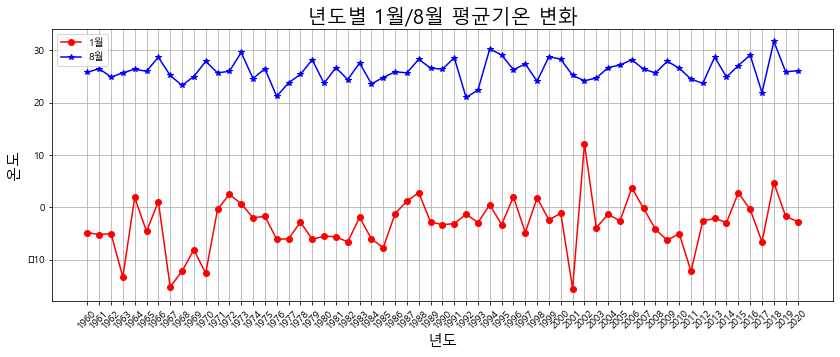

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import csv
  
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
plt.rc('font', family=font_name)

f=open('./data/seoul.csv', encoding='cp949')   
data=csv.reader(f)
header=next(data)

temp_1=[]    # 최고기온
temp_8=[]    # 최저기온
year_temp=[]   # 생일자 년도

for row in data:
    if row[2] !="":
        if int(row[2].split('-')[0]) >= 1960 and int(row[2].split('-')[0]) <= 2020 :
            # 1960년 이후부터 2020년까지의 데이터 검색
            if row[2][-5:]=="01-15":            # 1월 15일 데이터만 추출
                temp_1.append(float(row[3]))
                
            if row[2][-5:]=="08-15":            # 8월 15일 데이터만 추출
                temp_8.append(float(row[3]))
                year_temp.append(row[2].split('-')[0])  # 년도 데이터 추출

                
# 데이터를 이용한 시각화

plt.figure(figsize=(14, 5))  # 차트 크기 설정
plt.plot(year_temp, temp_1, label='1월', color='r', marker="o")
plt.plot(year_temp, temp_8, label='8월', color='b', marker='*')

plt.xticks(size=10, rotation=45)   # x축 라벨에 대한 회전, 글자크기, 'vertical' 90도

plt.title('년도별 1월/8월 평균기온 변화', size=20)
plt.xlabel('년도', size=15)
plt.ylabel('온도', size=15)
plt.legend(loc='best')   # best, lower right, ...
plt.grid(True)     # 그림 영역에 그리드 표시

plt.show()

### 히스토그램

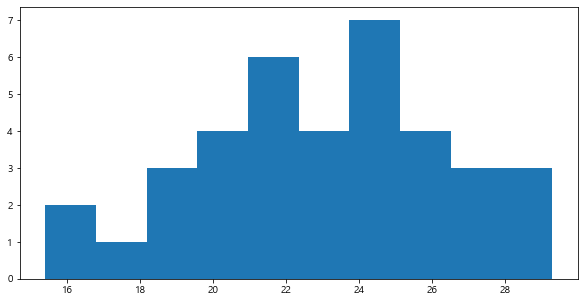

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(max_temp)
plt.show()

### 미션: 주사위(1~6)를 10번 던진 결과에 대한 히스토그램 출력
- numpy.random.randint(1, 7)
- for i in range(10)
- num_tmp=[], append()
- matplotlib.pyplot 이용해 히스토그램 출력

[6, 2, 4, 3, 6, 6, 3, 2, 4, 3, 6, 6, 4, 1, 3, 2, 6, 4, 4, 6, 3, 1, 6, 5, 6, 1, 1, 5, 1, 6, 3, 6, 3, 6, 1, 6, 4, 5, 2, 4, 6, 4, 4, 3, 5, 1, 4, 5, 4, 1, 2, 1, 1, 5, 6, 1, 3, 6, 1, 1, 6, 6, 1, 2, 2, 5, 4, 2, 3, 2, 5, 4, 4, 4, 1, 6, 6, 2, 1, 6, 6, 6, 5, 2, 2, 4, 6, 3, 6, 6, 3, 2, 3, 3, 4, 3, 1, 1, 5, 6]


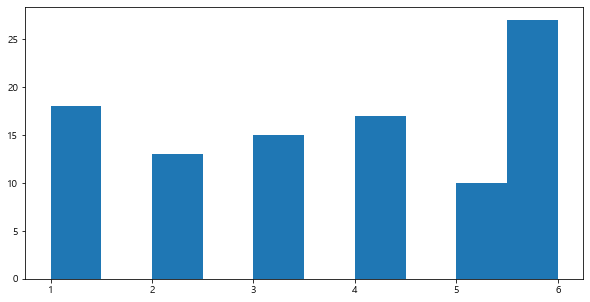

In [18]:
import numpy as np
import matplotlib.pyplot as plt

num_tmp=[np.random.randint(1,7) for i in range(100)]
print(num_tmp)

plt.figure(figsize=(10, 5))
plt.hist(num_tmp)
plt.show()

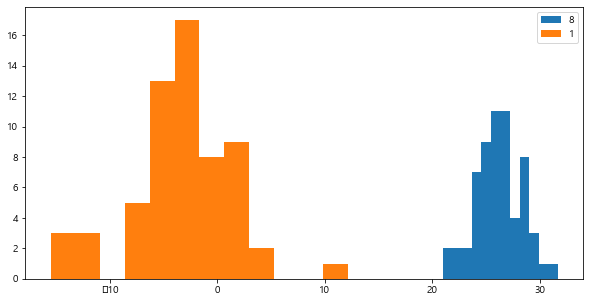

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(temp_8, bins=12, label='8')
plt.hist(temp_1, bins=12, label='1')
plt.legend()
plt.show()

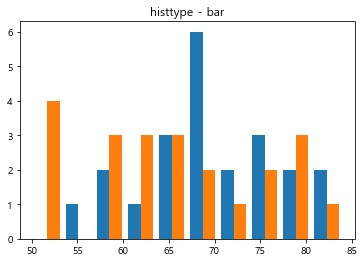

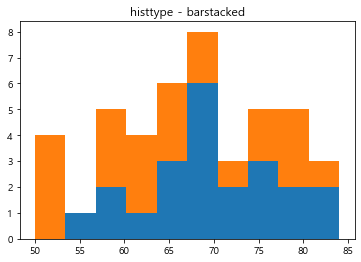

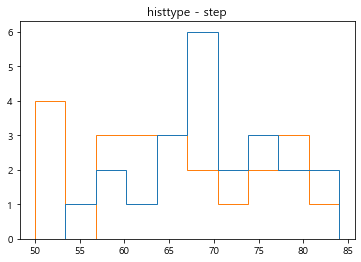

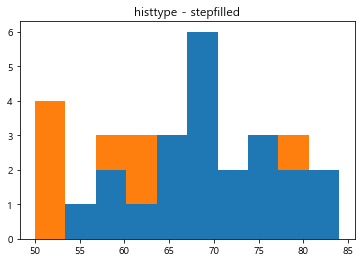

In [22]:
import matplotlib.pyplot as plt

weight1 = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71, 80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
weight2 = [52, 67, 84, 66, 58, 78, 71, 57, 76, 62, 51, 79, 69, 64, 76, 57, 63, 53, 79, 64, 50, 61]

plt.hist((weight1, weight2), histtype='bar')
plt.title('histtype - bar')
plt.figure()

plt.hist((weight1, weight2), histtype='barstacked')
plt.title('histtype - barstacked')
plt.figure()

plt.hist((weight1, weight2), histtype='step')
plt.title('histtype - step')
plt.figure()

plt.hist((weight1, weight2), histtype='stepfilled')
plt.title('histtype - stepfilled')
plt.show()